In [11]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [23]:
df = yf.download('^GSPC', start = '2012-01-01', end='2024-04-30')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000
...,...,...,...,...,...,...
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000


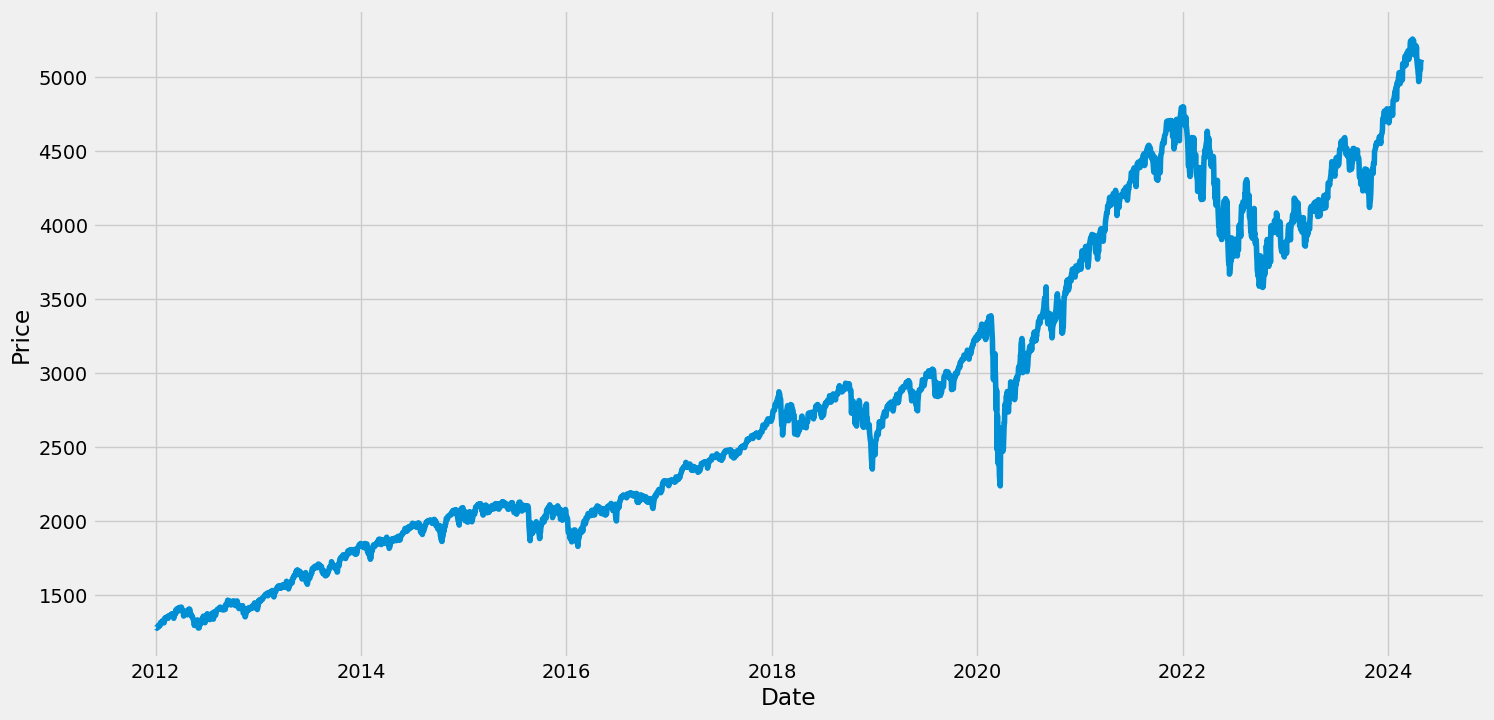

In [24]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [25]:
data = df.filter(['Close'])
dataset = data.values
training_length = math.ceil(len(dataset)*0.8)
print(training_length)

2480


In [26]:
# Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [6.03401391e-05],
       [1.00570991e-03],
       ...,
       [9.48223495e-01],
       [9.61182077e-01],
       [9.65257707e-01]])

In [28]:
# Create non-scaled and scaled training data set

training_data = scaled_data[0:training_length , :]

# Split into x_train and y_train

x_train = []
y_train = []

# data for 2 months
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00000000e+00, 6.03401391e-05, 1.00570991e-03, 1.88570608e-04,
       9.15169008e-04, 3.77641492e-03, 3.87699205e-03, 4.63630794e-03,
       3.02464922e-03, 4.17620671e-03, 7.78921833e-03, 9.41343001e-03,
       9.63468742e-03, 9.79057122e-03, 9.45115027e-03, 1.23199464e-02,
       1.04015535e-02, 9.87353124e-03, 9.03880552e-03, 8.88795518e-03,
       1.18246109e-02, 1.21891992e-02, 1.70568314e-02, 1.69135006e-02,
       1.75974067e-02, 1.83290385e-02, 1.88293767e-02, 1.64886029e-02,
       1.87841370e-02, 1.84648192e-02, 1.66369365e-02, 2.03605922e-02,
       2.11626311e-02, 2.14090251e-02, 2.02650485e-02, 2.17233095e-02,
       2.22965715e-02, 2.27617062e-02, 2.39157804e-02, 2.22815018e-02,
       2.43959848e-02, 2.32746280e-02, 2.19420501e-02, 1.66696233e-02,
       1.90003609e-02, 2.23393252e-02, 2.35863957e-02, 2.36417023e-02,
       2.98921857e-02, 2.94723215e-02, 3.15641846e-02, 3.19589429e-02,
       3.33618972e-02, 3.22983639e-02, 3.16371084e-02, 2.90951803e-02,
     

In [29]:
# COonvert training data to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
# Reshape data to fit into LSTM by making it 3D

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2420, 60, 1)

In [33]:
# Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [34]:
#Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size=1, epochs = 1)


2420/2420 [==============================] - 53s 19ms/step - loss: 7.4479e-04


In [37]:
# Creating testing dataset
test_data = scaled_data[training_length - 60 : , :]

# 
x_test = []
y_test = dataset[training_length:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])
    

In [41]:
# Convert to numpy
x_test = np.array(x_test)

# Reshape to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
# Get models to predict values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 2s 15ms/step


In [43]:
# Eval w/ RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

18.642461961315526

C:\Users\Ahmad Saleem Mirza\AppData\Local\Temp\ipykernel_23692\953825595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


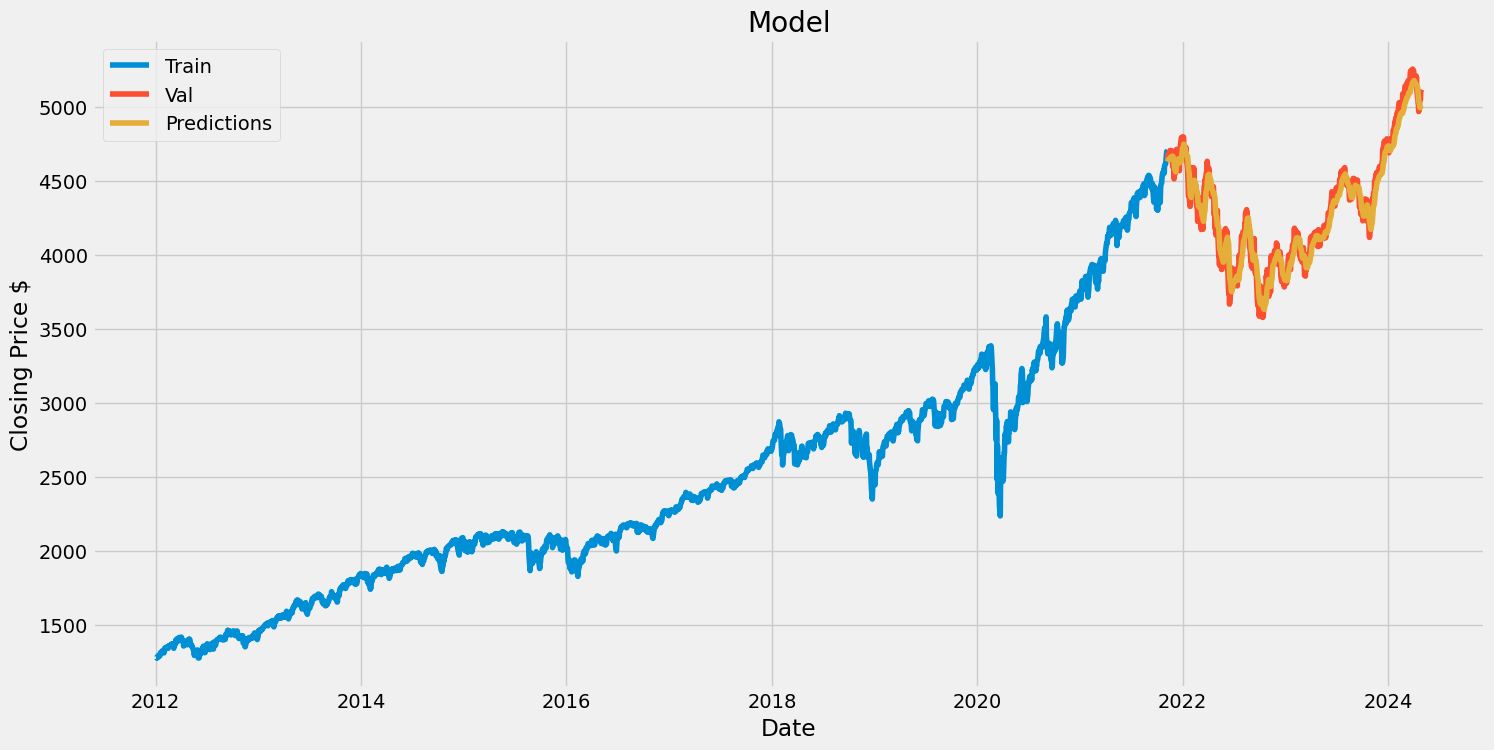

In [46]:
# plot the data
train = data[:training_length]
valid = data[training_length: ]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [47]:
valid

,Close,Predictions
Date,,
2021-11-09,4685.250000,4631.182617
2021-11-10,4646.709961,4642.085449
2021-11-11,4649.270020,4644.553223
2021-11-12,4682.850098,4643.212891
2021-11-15,4682.799805,4644.405762
...,...,...
2024-04-23,5070.549805,4996.847168
2024-04-24,5071.629883,4992.641113
2024-04-25,5048.419922,4995.203613


In [54]:
sp500 = yf.download('^GSPC', start = '2012-01-01', end='2024-04-30')
new_df = sp500.filter(['Close'])

# Get the last 60 closing values and convert df to array
last60days = new_df[-60:].values

# Scale data
last60days_scaled = scaler.transform(last60days)

X_test  = []

X_test.append(last60days_scaled)
# Convert X_test to np array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the scaled predicted price
predicted_price = model.predict(X_test)
# Undo scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 36ms/step
[[5020.0225]]


In [56]:
sp500_2 = yf.download('^GSPC', start = '2024-04-30', end='2024-05-01')
print(sp500_2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-30    5035.689941
Name: Close, dtype: float64
